In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

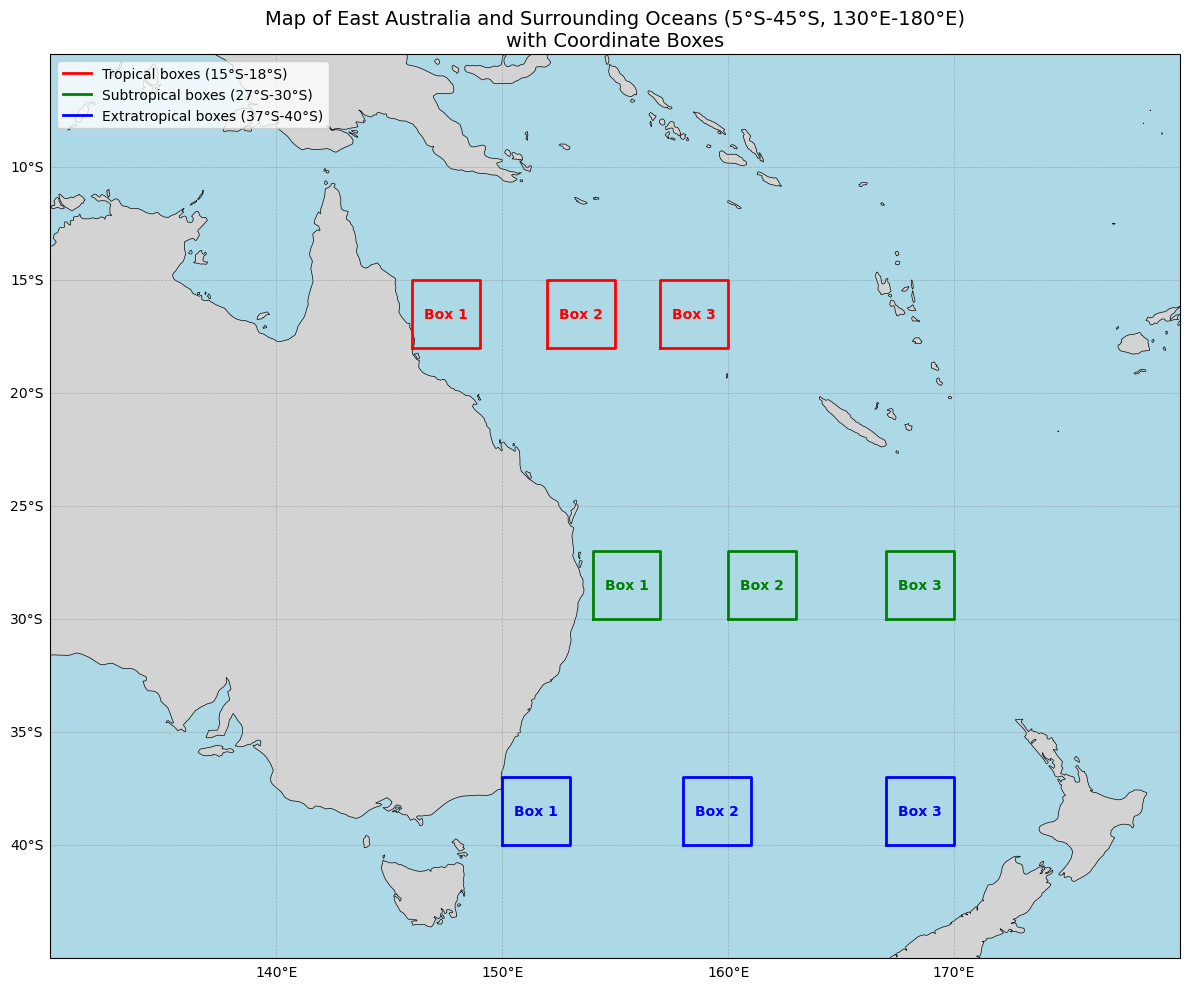

In [ ]:


# Create figure and axes with projection
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set map extent: [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([130, 180, -45, -5], crs=ccrs.PlateCarree())

# Add coastlines, land, and ocean features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add gridlines with labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Define the coordinates for the 9 boxes
boxes = [
    # Northern boxes (lat=slice(-18,-15), lon=slice(146,149), etc.)
    {'lat': (-18, -15), 'lon': (146, 149), 'color': 'red', 'label': '1'},
    {'lat': (-18, -15), 'lon': (152, 155), 'color': 'red', 'label': '2'},
    {'lat': (-18, -15), 'lon': (157, 160), 'color': 'red', 'label': '3'},
    
    # Middle boxes (lat=slice(-30,-27), lon=slice(154,157), etc.)
    {'lat': (-30, -27), 'lon': (154, 157), 'color': 'green', 'label': '1'},
    {'lat': (-30, -27), 'lon': (160, 163), 'color': 'green', 'label': '2'},
    {'lat': (-30, -27), 'lon': (167, 170), 'color': 'green', 'label': '3'},
    
    # Southern boxes (lat=slice(-40,-37), lon=slice(150,153), etc.)
    {'lat': (-40, -37), 'lon': (150, 153), 'color': 'blue', 'label': '1'},
    {'lat': (-40, -37), 'lon': (158, 161), 'color': 'blue', 'label': '2'},
    {'lat': (-40, -37), 'lon': (167, 170), 'color': 'blue', 'label': '3'},
]

# Plot each box
for box in boxes:
    # Extract coordinates
    min_lon, max_lon = box['lon']
    min_lat, max_lat = box['lat']
    
    # Create box vertices
    lons = [min_lon, max_lon, max_lon, min_lon, min_lon]
    lats = [min_lat, min_lat, max_lat, max_lat, min_lat]
    
    # Plot box
    ax.plot(lons, lats, color=box['color'], linewidth=2, transform=ccrs.PlateCarree())
    
    # Add label in the center of the box
    center_lon = (min_lon + max_lon) / 2
    center_lat = (min_lat + max_lat) / 2
    ax.text(center_lon, center_lat, f"Box {box['label']}", color=box['color'], 
            fontweight='bold', ha='center', va='center', transform=ccrs.PlateCarree())

# Add title
plt.title('Map of East Australia and Surrounding Oceans (5°S-45°S, 130°E-180°E)\nwith Coordinate Boxes', fontsize=14)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=2, label='Tropical boxes (15°S-18°S)'),
    plt.Line2D([0], [0], color='green', lw=2, label='Subtropical boxes (27°S-30°S)'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Extratropical boxes (37°S-40°S)')
]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.savefig('australia_map_with_boxes.png', dpi=300)
plt.show()